# Importing the required libraries


In [1]:
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt# for graph plotting
import numpy as np
import seaborn as sns # for graph plotting
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier for fraud detection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix # Metrics for model evaluation

In [2]:
data = pd.read_csv('DuplicatePayment.csv')  # Load the CSV file into a DataFrame


In [3]:

#priting 
data.head()

,Invoice #,PO Number,Payment Date,Payment #,Vendor #,Status,Invoice Amount,Invoice Date,Facility Id,Customer Status,Voucher ID,Dup Voucher,Matches Payment Criteria,Connect ID,DetectType,FacilityName_Decoded,VendorName_Decoded
0,11449922-1,NaN,2023-03-23,9111827.0,107997,Paid-in-Full,222.05,2022-09-30,101080,False Positive,1655685.0,0.0,0.0,ZeOpT09cBI,Likely,James Salazar,Erika Richards
1,1144997-1,NaN,2022-12-08,9104785.0,107997,Paid-in-Full,222.05,2022-09-30,101080,NaN,1521497.0,0.0,0.0,ZeOpT09cBI,Likely,James Salazar,Erika Richards
2,1144998-1,NaN,2022-12-08,9104786.0,107997,Paid-in-Full,222.05,2022-09-30,101080,NaN,1521498.0,0.0,0.0,ZeOpT09cBI,Likely,James Salazar,Erika Richards
3,2171172,NaN,2023-03-16,9110794.0,108980,Paid-in-Full,200.00,2022-08-25,101080,Sent to Specialist,1650360.0,0.0,0.0,tRovMJK7vb,Likely,James Salazar,Lydia King
4,21711772,NaN,2023-02-23,9109377.0,108980,Paid-in-Full,200.00,2022-08-25,101080,NaN,1619307.0,0.0,0.0,tRovMJK7vb,Likely,James Salazar,Lydia King


In [4]:
data.tail()

,Invoice #,PO Number,Payment Date,Payment #,Vendor #,Status,Invoice Amount,Invoice Date,Facility Id,Customer Status,Voucher ID,Dup Voucher,Matches Payment Criteria,Connect ID,DetectType,FacilityName_Decoded,VendorName_Decoded
7011,J980807,101035004288,2021-09-23,7014721.0,106964,Paid-in-Full,137.00,2021-08-27,101035,NaN,955122.0,0.0,0.0,Jh1osXcejL,Maybe,Emily Osborn,Johnny Davies
7012,J980530,101035004233,2021-09-23,7014721.0,106964,Paid-in-Full,137.00,2021-08-27,101035,NaN,955125.0,0.0,0.0,Jh1osXcejL,Maybe,Emily Osborn,Johnny Davies
7013,7136408959,101085007351,2021-09-23,7004712.0,103085,Paid-in-Full,142.24,2021-08-28,101085,NaN,955198.0,0.0,0.0,6oeSWJD5mP,Maybe,Nicole Kerr,Heidi Lopez
7014,7136408949,101070024470,2021-09-23,7010987.0,103085,Paid-in-Full,142.24,2021-08-28,101070,NaN,955192.0,0.0,0.0,6oeSWJD5mP,Maybe,Wanda Graves,Heidi Lopez
7015,12000610567,NaN,2021-09-02,7002011.0,111188,Paid-in-Full,1216.00,2020-09-15,101201,NaN,955432.0,0.0,0.0,v0MxvK9CcD,Maybe,Christopher Fo,NaN


In [5]:
#checkig if there are any missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Invoice #                      0
PO Number                   3691
Payment Date                 807
Payment #                    823
Vendor #                       0
Status                         0
Invoice Amount                 0
Invoice Date                   0
Facility Id                    0
Customer Status             6383
Voucher ID                     1
Dup Voucher                    2
Matches Payment Criteria       2
Connect ID                     0
DetectType                     0
FacilityName_Decoded           0
VendorName_Decoded             1
dtype: int64


In [6]:
data.describe()

,Payment #,Invoice Amount,Facility Id,Voucher ID,Dup Voucher,Matches Payment Criteria
count,6.193000e+03,7016.000000,7016.000000,7.015000e+03,7014.000000,7014.000000
mean,6.475647e+06,3323.770676,101102.888398,1.222874e+06,0.001568,0.000143
std,2.824263e+06,10334.516073,59.318366,3.445266e+05,0.039573,0.011940
min,2.004000e+03,-8320.000000,101030.000000,7.799400e+04,0.000000,0.000000
25%,7.002487e+06,160.000000,101080.000000,1.024974e+06,0.000000,0.000000
50%,7.024380e+06,350.000000,101080.000000,1.234137e+06,0.000000,0.000000
75%,9.068889e+06,1800.000000,101088.000000,1.517320e+06,0.000000,0.000000
max,9.112910e+06,274253.000000,101353.000000,1.682574e+06,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7016 entries, 0 to 7015
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Invoice #                 7016 non-null   object 
 1   PO Number                 3325 non-null   object 
 2   Payment Date              6209 non-null   object 
 3   Payment #                 6193 non-null   float64
 4   Vendor #                  7016 non-null   object 
 5   Status                    7016 non-null   object 
 6   Invoice Amount            7016 non-null   float64
 7   Invoice Date              7016 non-null   object 
 8   Facility Id               7016 non-null   int64  
 9   Customer Status           633 non-null    object 
 10  Voucher ID                7015 non-null   float64
 11  Dup Voucher               7014 non-null   float64
 12  Matches Payment Criteria  7014 non-null   float64
 13  Connect ID                7016 non-null   object 
 14  DetectTy

In [8]:

# Function to check if a column is in datetime format
def is_datetime_column(column):
    try:
        pd.to_datetime(column, errors='raise')
        return True
    except:
        return False

if is_datetime_column(data['Invoice Date']):
    print("Column 'Invoice Date' is in datetime format.")
else:
    print("Column 'Invoice Date' is not in datetime format.")

# Check 'Payment Date' column
if is_datetime_column(data['Payment Date']):
    print("Column 'Payment Date' is in datetime format.")
else:
    print("Column 'Payment Date' is not in datetime format.")

Column 'Invoice Date' is in datetime format.
Column 'Payment Date' is in datetime format.


In [9]:
# Convert date columns to datetime format
data['Payment Date'] = pd.to_datetime(data['Payment Date'], errors='coerce')  # Convert 'Payment Date' to datetime

In [10]:

# Function to check if a column contains both strings and integers
def has_mixed_data_types(column):
    return any(isinstance(item, str) for item in column) and any(isinstance(item, int) for item in column)

# Iterate through the columns and check for mixed data types
columns_with_mixed_types = []
for col in data.columns:
    if has_mixed_data_types(data[col]):
        columns_with_mixed_types.append(col)

# Print the columns with mixed data types
if columns_with_mixed_types:
    print("Columns with both strings and integers:")
    for col in columns_with_mixed_types:
        print(f"  - {col}")
else:
    print("No columns contain both strings and integers.")

No columns contain both strings and integers.


In [11]:

# Convert MIXED columnS values to strings
data['Customer Status'] = data['Customer Status'].astype(str)
data['PO Number'] = data['PO Number'].astype(str)

In [12]:
# Encode categorical columns
label_encoder = LabelEncoder()  # Initialize the LabelEncoder
data['Status'] = label_encoder.fit_transform(data['Status'])  # Encode 'Status' column
data['Customer Status'] = label_encoder.fit_transform(data['Customer Status'])  # Encode 'Customer Status' column

# Step 3: Feature Engineering

In [13]:
# For simplicity, we will use only a subset of features for the model.
features = ['Invoice Amount', 'Status', 'Customer Status']  # Select features to be used for fraud detection

# Step 4: Fraud Detection Model

In [14]:
# Splitting data into features (X) and target (y)
X = data[features]  # Features (input) DataFrame
y = data['DetectType'] 


In [15]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test split

In [16]:
y_test.shape

(1404,)

# Step 5: Model Training

In [17]:
rf_classifier = RandomForestClassifier(random_state=42)  # Initialize the Random Forest Classifier
rf_classifier.fit(X_train, y_train)  # Train the classifier using the training data

RandomForestClassifier(random_state=42)

# Step 6: Model Evaluation

In [18]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)  # Predict the target labels for the test data

In [19]:
# Display the predicted output
print("Predicted Output:")
print(y_pred)

Predicted Output:
['Maybe' 'Maybe' 'Likely' ... 'Maybe' 'Maybe' 'Maybe']


In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
precision = precision_score(y_test, y_pred, average='weighted')  # Calculate the weighted precision
recall = recall_score(y_test, y_pred, average='weighted')  # Calculate the weighted recall
f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate the weighted F1 score
//roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test), multi_class='ovr')  # Calculate the ROC AUC score







SyntaxError: invalid syntax (1894187307.py, line 6)

# Step 7: Display Evaluation Metrics

In [21]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

NameError: name 'accuracy' is not defined


# Step 8: Confusion Matrix

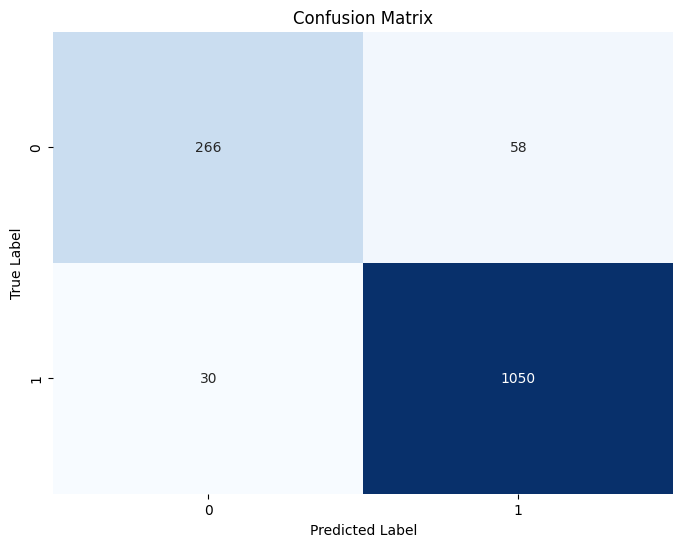

In [94]:
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()